<h1 style ="text-align:center">CAR SALE REPORT</h1>
<img src="image\intro_Pic.png" style="height: 400px; width:100%; algin-content:center">

<h2> Introduction</h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
 

In [3]:
data = pd.read_csv("Car Sales.xlsx - car_data.csv")
data

<h2>Information about the Dataset</h2>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


<h2>Descriptive statistics</h2>
<h3>Gender</h3>

In [6]:
count_Gender  = data['Gender'].value_counts().reset_index()
count_Gender['percent'] = round((count_Gender['count']/len(data['Gender']))*100,2)
count_Gender

,Gender,count,percent
0,Male,18798,78.63
1,Female,5108,21.37


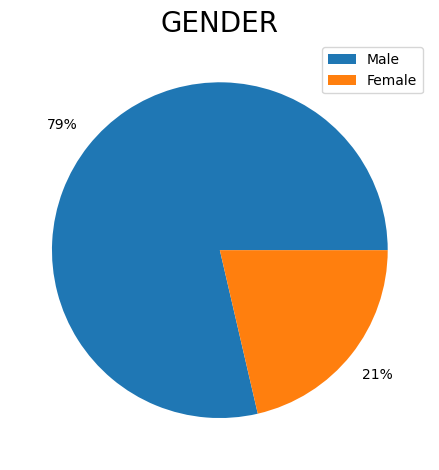

In [7]:
plt.pie(count_Gender['percent'], autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.2)
plt.title("GENDER", size= 20)
plt.legend(count_Gender['Gender'])
plt.tight_layout()
plt.show()

<h5>--> Conclusion:</h5> <p>Based on the chart above, we can see that the customers of these dealers are mainly male customers. Because for vehicle products, male customers will often be the ones with basic or advanced knowledge in this field, so they will often be the ones to buy.</p>

<h3>WHICH IS THE FIVE MOST SELLING CAR BRAND IN THE DATA?</h3>

In [148]:
car_Brand =data['Company'].value_counts().reset_index()
car_Brand_Top_5 = car_Brand[0:5].sort_values(ascending =True, by='count')
car_Brand_Top_5

,Company,count
4,Mercedes-B,1285
3,Volkswagen,1333
2,Ford,1614
1,Dodge,1671
0,Chevrolet,1819


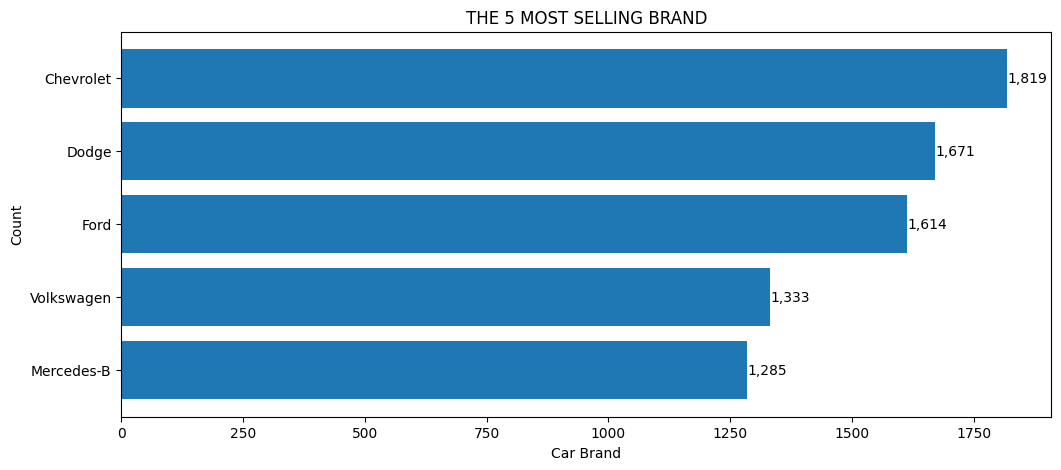

In [149]:
fig, ax = plt.subplots(figsize=(12,5))
bar_Car_Brand = ax.barh(car_Brand_Top_5['Company'], car_Brand_Top_5['count'])
ax.set(xlabel='Car Brand', ylabel="Count", title="THE 5 MOST SELLING BRAND")
ax.bar_label(bar_Car_Brand, fmt='{:,.0f}')
plt.show()

<h5>--> Conclusion:</h5> <p>We can see that the top 5 best-selling car brands are Chevrolet, Dodge, Ford, Volkswagen, Mercedes, Mitsubishi. These are also major car companies in the US market.</p> <br>
<img src="image\logo_Car_Sales.png" style="height: 200px; width:70%; algin-content:center">

<h2>How will revenue from car sales change over the months of 2022 and 2023?</h2>

In [10]:
date_Price = data[['Date','Price ($)']]
date_Price['month'] = pd.DatetimeIndex(date_Price['Date']).month
date_Price['year'] = pd.DatetimeIndex(date_Price['Date']).year
date_Price

C:\Users\mynam\AppData\Local\Temp\ipykernel_7840\3443998874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_Price['month'] = pd.DatetimeIndex(date_Price['Date']).month
C:\Users\mynam\AppData\Local\Temp\ipykernel_7840\3443998874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_Price['year'] = pd.DatetimeIndex(date_Price['Date']).year


,Date,Price ($),month,year
0,1/2/2022,26000,1,2022
1,1/2/2022,19000,1,2022
2,1/2/2022,31500,1,2022
3,1/2/2022,14000,1,2022
4,1/2/2022,24500,1,2022
...,...,...,...,...
23901,12/31/2023,12000,12,2023
23902,12/31/2023,16000,12,2023
23903,12/31/2023,21000,12,2023
23904,12/31/2023,31000,12,2023


In [11]:
date_Price_Month_Year = date_Price[['month','Price ($)','year']].groupby(by=['year','month']).sum().reset_index()

In [12]:
date_Price_Month_2023 = date_Price_Month_Year[date_Price_Month_Year['year']==2023]
date_Price_Month_2022 = date_Price_Month_Year[date_Price_Month_Year['year']==2022]
date_Price_Month_2023 

,year,month,Price ($)
12,2023,1,12764298
13,2023,2,11848580
14,2023,3,22203814
15,2023,4,24115567
16,2023,5,32613157
17,2023,6,28901691
18,2023,7,28243030
19,2023,8,25162276
20,2023,9,51416962
21,2023,10,28043756


In [13]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

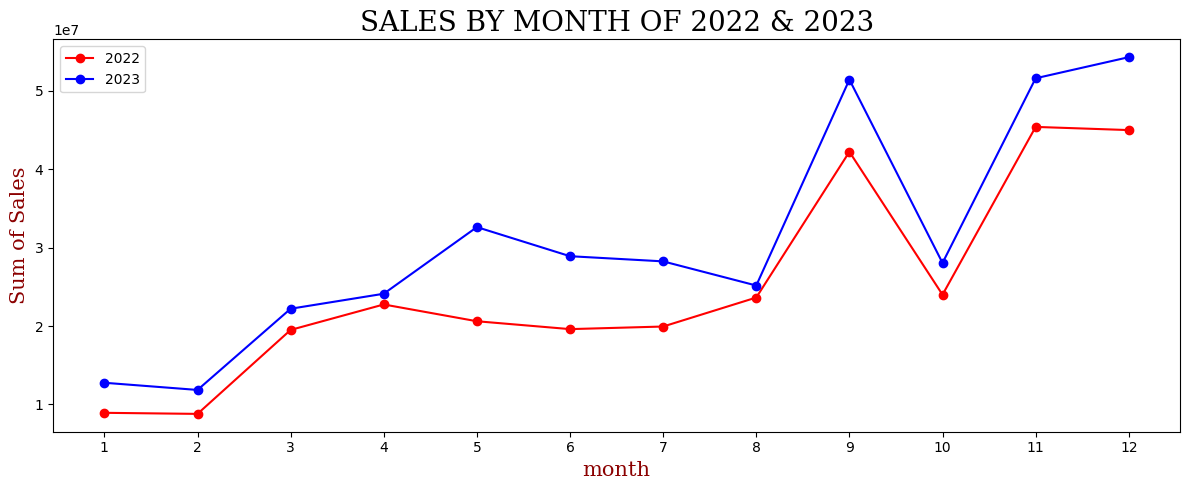

In [122]:
plt.figure(figsize=(12,5))

plt.plot('month', "Price ($)", data = date_Price_Month_2022, marker = "o" , color = 'red')
plt.plot('month', "Price ($)", data = date_Price_Month_2023, marker = "o" , color = 'blue')
plt.xticks(date_Price_Month_2023['month'], [x+1 for x in range(12)])

plt.legend(['2022','2023'])
plt.title("SALES BY MONTH OF 2022 & 2023", fontdict = font1, color = 'black')
plt.xlabel("month", fontdict= font2)
plt.ylabel("Sum of Sales", fontdict= font2)
plt.tight_layout()
plt.show()

<h5>--> Conclusion:</h5> <p>Based on the chart above, it can be seen that the total amount of sales in 2022 is much smaller than in 2023.<br>
Revenue from car sales mainly increased sharply at the end of the year and at the beginning of the year revenue will be low from the above Dealers</p>

<h2>Is there a relationship between car selling price and customer income?</h2>

In [48]:
import numpy as np

<h3>Descriptive analysis of customer's annual income</h3>

In [195]:
print("Mean    : ${:0,.2f}".format(np.mean(data[['Annual Income']])))
print("Median  : ${:0,.0f}".format(np.median(data[['Annual Income']])))
print("Max     : ${:0,.0f}".format(max(data['Annual Income'])))
print("Min     : ${:0,.0f}".format(min(data['Annual Income'])))

Mean    : $830,840.29
Median  : $735,000
Max     : $11,200,000
Min     : $10,080


In [15]:
annualIncome_Vs_Price = data[['Annual Income','Price ($)']].sort_values(by= 'Annual Income')
annualIncome_Vs_Price['annualIncome'] = annualIncome_Vs_Price['Annual Income']/1000
annualIncome_Vs_Price['Price'] = annualIncome_Vs_Price['Price ($)']/1000
annualIncome_Vs_Price

,Annual Income,Price ($),annualIncome,Price
23451,10080,22801,10.08,22.801
0,13500,26000,13.50,26.000
21222,13500,53000,13.50,53.000
8913,13500,17001,13.50,17.001
8911,13500,22001,13.50,22.001
...,...,...,...,...
22407,6600000,39000,6600.00,39.000
9996,6800000,15000,6800.00,15.000
6150,7650000,21000,7650.00,21.000
15675,8000000,85000,8000.00,85.000


<h3>Is there a relationship between car selling price and customer income?</h3>

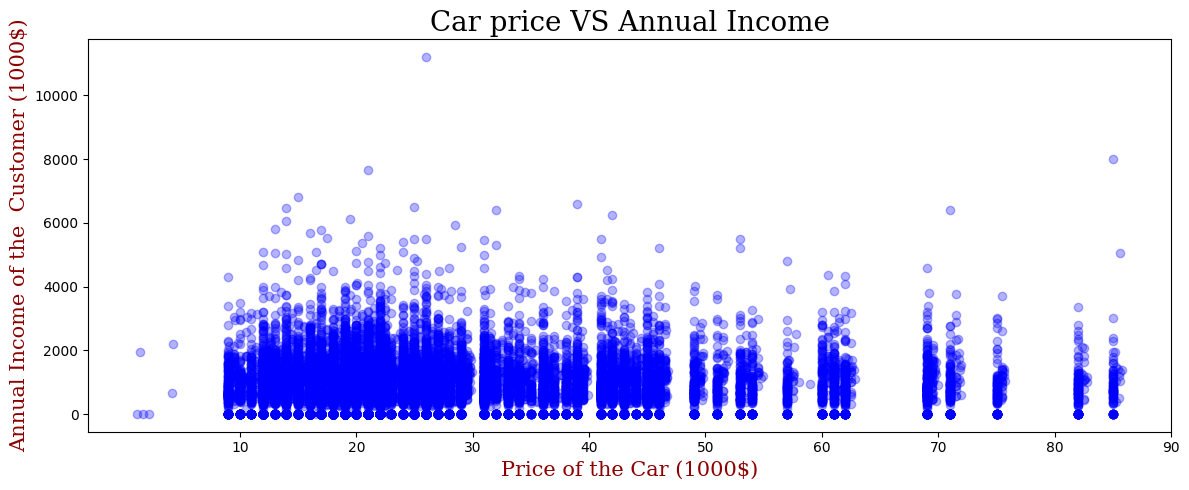

In [59]:
plt.figure(figsize=(12,5))
plt.scatter(annualIncome_Vs_Price['Price'],annualIncome_Vs_Price['annualIncome'], color='blue', alpha=0.3)
plt.title("Car price VS Annual Income", fontdict = font1, color = 'black')
plt.xlabel("Price of the Car (1000$)", fontdict=font2)
plt.ylabel("Annual Income of the  Customer (1000$)", fontdict=font2)
plt.xticks([(i+1)*10 for i in range(9)])
plt.tight_layout()
plt.show()

<h5>--> Conclusion 1:</h5> <p>Based on the Scatter chart on the relationship between the car's selling price and the annual income of car buyers. From there we can see that the price of the car has no close relationship with the buyer's income.</p>

In [115]:
#Người có thu nhập thấp xe mua với giá xe nào
smallest_AnnualIncome_VS_Car_Price = data[data['Annual Income'].isin(np.array(annualIncome_Vs_Price['Annual Income'].head(10).values))].sort_values(by='Price ($)')
smallest_AnnualIncome_VS_Car_Price

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
13946,C_CND_013947,5/23/2023,Sajid,Female,13500,Gartner Buick Hyundai Saab,Ford,Taurus,DoubleÂ Overhead Camshaft,Auto,Black,1200,38701-8047,SUV,7828930,Greenville
14010,C_CND_014011,5/26/2023,Fatima,Male,13500,Ryder Truck Rental and Leasing,Lincoln,Town car,Overhead Camshaft,Manual,Black,1700,06457-3834,Hatchback,7469239,Middletown
14020,C_CND_014021,5/26/2023,Oweis,Male,13500,Ryder Truck Rental and Leasing,Mercedes-B,CL500,Overhead Camshaft,Manual,Black,2200,06457-3834,SUV,8583796,Middletown
5202,C_CND_005203,9/4/2022,Jacqueline,Male,13500,C & M Motors Inc,Volkswagen,Passat,DoubleÂ Overhead Camshaft,Auto,Black,9000,60504-7114,Hatchback,8731254,Aurora
16988,C_CND_016989,8/23/2023,Livia,Male,13500,Gartner Buick Hyundai Saab,Mercury,Grand Marquis,DoubleÂ Overhead Camshaft,Auto,Black,9000,38701-8047,SUV,7070434,Greenville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22327,C_CND_022328,12/4/2023,Katie,Female,13500,Diehl Motor CO Inc,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85000,06457-3834,Passenger,7580570,Austin
21109,C_CND_021110,11/14/2023,Cassandra,Male,13500,Star Enterprises Inc,Toyota,RAV4,Overhead Camshaft,Manual,Black,85000,99301-3882,Hatchback,7550631,Aurora
13979,C_CND_013980,5/23/2023,Mateo,Female,13500,Tri-State Mack Inc,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85001,85257-3102,Passenger,7022622,Middletown
20002,C_CND_020003,10/28/2023,Christian,Male,13500,Enterprise Rent A Car,Mercedes-B,S-Class,Overhead Camshaft,Manual,Black,85001,60504-7114,SUV,6313664,Aurora


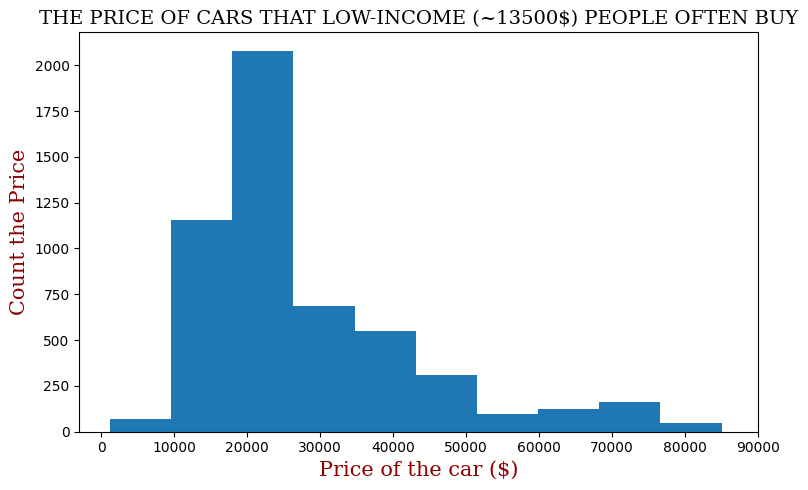

In [98]:
plt.figure(figsize=(8,5))
plt.hist(smallest_AnnualIncome_VS_Car_Price['Price ($)'], bins= 10)
plt.title("THE PRICE OF CARS THAT LOW-INCOME (~13500$) PEOPLE OFTEN BUY", fontdict=font1, color = 'black', size = 14)
plt.xlabel("Price of the car ($)", fontdict=font2)
plt.ylabel("Count the Price", fontdict=font2)
plt.xticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000])
plt.tight_layout()
plt.show()

In [120]:
#Người có thu nhập thấp xe mua với giá xe nào
The_Highest_AnnualIncome_VS_Car_Price = data[data['Annual Income'].isin(np.array(annualIncome_Vs_Price['Annual Income'].tail(50).values))].sort_values(by='Price ($)')
The_Highest_AnnualIncome_VS_Car_Price

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
14470,C_CND_014471,6/5/2023,Jayson,Male,5100000,Race Car Help,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,78758-7841,Hatchback,8515019,Austin
1227,C_CND_001228,3/26/2022,Athena,Male,5800000,Race Car Help,Cadillac,Eldorado,Overhead Camshaft,Manual,Pale White,13000,78758-7841,Passenger,6135398,Austin
15140,C_CND_015141,6/23/2023,Anthony,Male,5050000,Hatfield Volkswagen,Ford,F-Series,Overhead Camshaft,Manual,Pale White,13001,99301-3882,Passenger,6606801,Pasco
7657,C_CND_007658,11/7/2022,Kayden,Female,6460000,U-Haul CO,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,78758-7841,SUV,8797956,Pasco
15611,C_CND_015612,7/8/2023,Sabrina,Male,5020000,Suburban Ford,Honda,Accord,Overhead Camshaft,Manual,Pale White,14000,53546-9427,Sedan,6815752,Janesville
13419,C_CND_013420,5/6/2023,Gaetan,Male,6050000,Race Car Help,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14001,78758-7841,SUV,6338366,Austin
9996,C_CND_009997,12/17/2022,Peyton,Male,6800000,Progressive Shippers Cooperative Association No,BMW,323i,DoubleÂ Overhead Camshaft,Auto,Pale White,15000,53546-9427,Hatchback,8787073,Greenville
11550,C_CND_011551,3/1/2023,Christine,Male,4850000,Pars Auto Sales,Hyundai,Sonata,Overhead Camshaft,Manual,Black,15001,38701-8047,SUV,7226597,Greenville
16570,C_CND_016571,8/8/2023,Angel,Male,5700000,Tri-State Mack Inc,Nissan,Maxima,Overhead Camshaft,Manual,Pale White,16001,85257-3102,Sedan,7085158,Scottsdale
13440,C_CND_013441,5/6/2023,Damaris,Female,5075000,New Castle Ford Lincoln Mercury,Nissan,Maxima,Overhead Camshaft,Manual,Red,16500,60504-7114,Sedan,6906467,Aurora


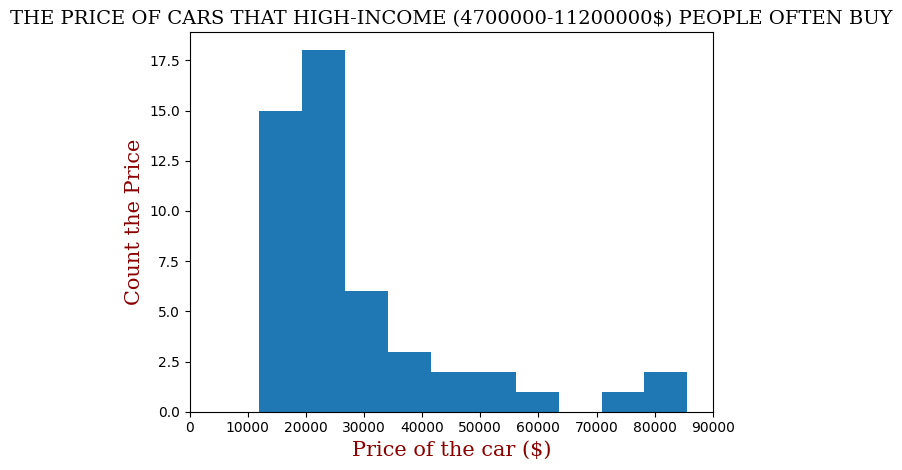

In [136]:
plt.hist(The_Highest_AnnualIncome_VS_Car_Price['Price ($)'], bins= 10)
plt.title("THE PRICE OF CARS THAT HIGH-INCOME ("+ str(int(min(The_Highest_AnnualIncome_VS_Car_Price['Annual Income'])))+ "-"+str(int(max(The_Highest_AnnualIncome_VS_Car_Price['Annual Income']))) +"$) PEOPLE OFTEN BUY", fontdict=font1, color = 'black', size = 14)
plt.xlabel("Price of the car ($)", fontdict=font2)
plt.ylabel("Count the Price", fontdict=font2)
plt.xticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000])
plt.tight_layout()
plt.show()

<h5>--> Conclusion:</h5> <p>Based on the chart above, it can be seen that the total amount of sales in 2022 is much smaller than in 2023.<br>
Revenue from car sales mainly increased sharply at the end of the year and at the beginning of the year revenue will be low from the above Dealers</p>